In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 

In [3]:
df = pd.read_csv("tamrin 3.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# preprocessing
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["Gender"])
df["Gender"] = le.transform(df["Gender"])

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [48]:
#Normalizing
from sklearn.preprocessing import StandardScaler
x = df.values[:,1:]
x = StandardScaler().fit(x).transform(x)


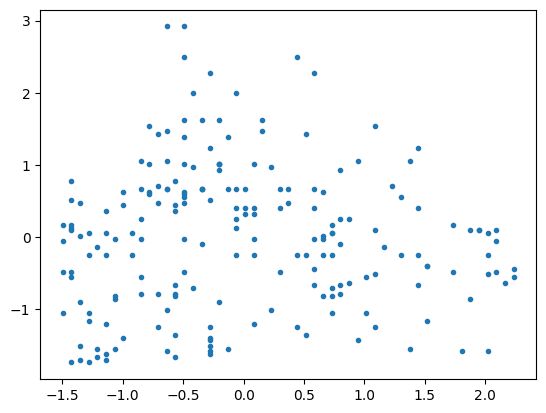

In [98]:
plt.scatter(x[:, 1], x[:, 2], marker='.')

### K-Means

#### Gender & Spending Score

In [91]:
# modeling
x1 = df[['Gender' , 'Spending Score (1-100)']].iloc[: , :].values
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)
k_means.fit(x1)
labels = k_means.labels_
centers = k_means.cluster_centers_

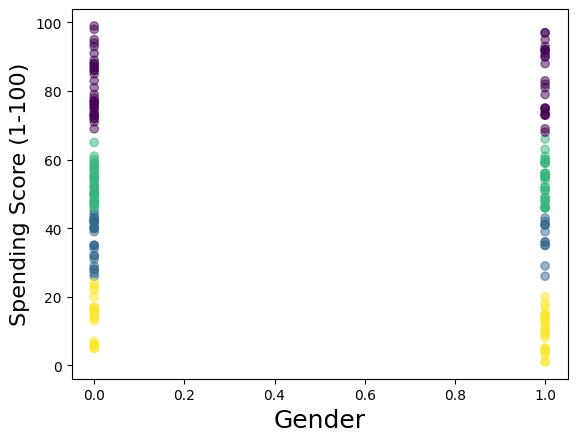

In [92]:
# plotting
plt.scatter(x1[:, 0], x1[:, 1], c=labels.astype(float), alpha=0.5)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Spending Score (1-100)', fontsize=16)
plt.show()

#### Age & Spending Score

In [93]:
# modeling
x1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)
k_means.fit(x1)
labels = k_means.labels_
centers = k_means.cluster_centers_

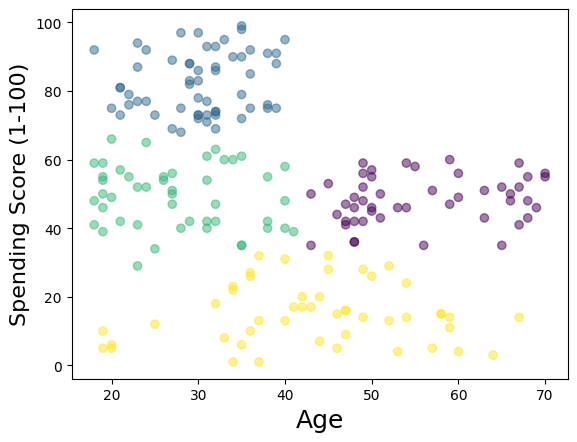

In [94]:
# plotting
plt.scatter(x1[:, 0], x1[:, 1], c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Spending Score (1-100)', fontsize=16)

plt.show()

#### Annual Income & Spending Score

In [95]:
# modeling
x1 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
k_means = KMeans(init="k-means++", n_clusters=5, n_init=12)
k_means.fit(x1)
labels = k_means.labels_
centers = k_means.cluster_centers_

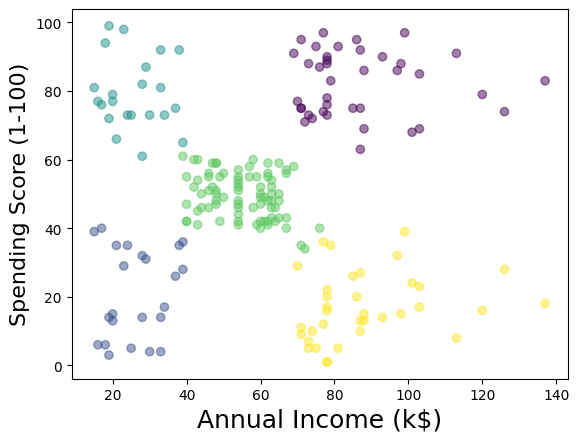

In [96]:
# plotting
plt.scatter(x1[:, 0], x1[:, 1], c=labels.astype(float), alpha=0.5)
plt.xlabel('Annual Income (k$)', fontsize=18)
plt.ylabel('Spending Score (1-100)', fontsize=16)

plt.show()

### Hierarchical

[[0.         1.63681098 2.38878538 ... 4.54611614 4.81867651 5.02250496]
 [1.63681098 0.         3.54154808 ... 4.3182849  5.31878915 4.70189264]
 [2.38878538 3.54154808 0.         ... 5.42195122 5.13299938 5.90251765]
 ...
 [4.54611614 4.3182849  5.42195122 ... 0.         2.21418015 0.5647686 ]
 [4.81867651 5.31878915 5.13299938 ... 2.21418015 0.         2.5274803 ]
 [5.02250496 4.70189264 5.90251765 ... 0.5647686  2.5274803  0.        ]]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2972\172375447.py:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


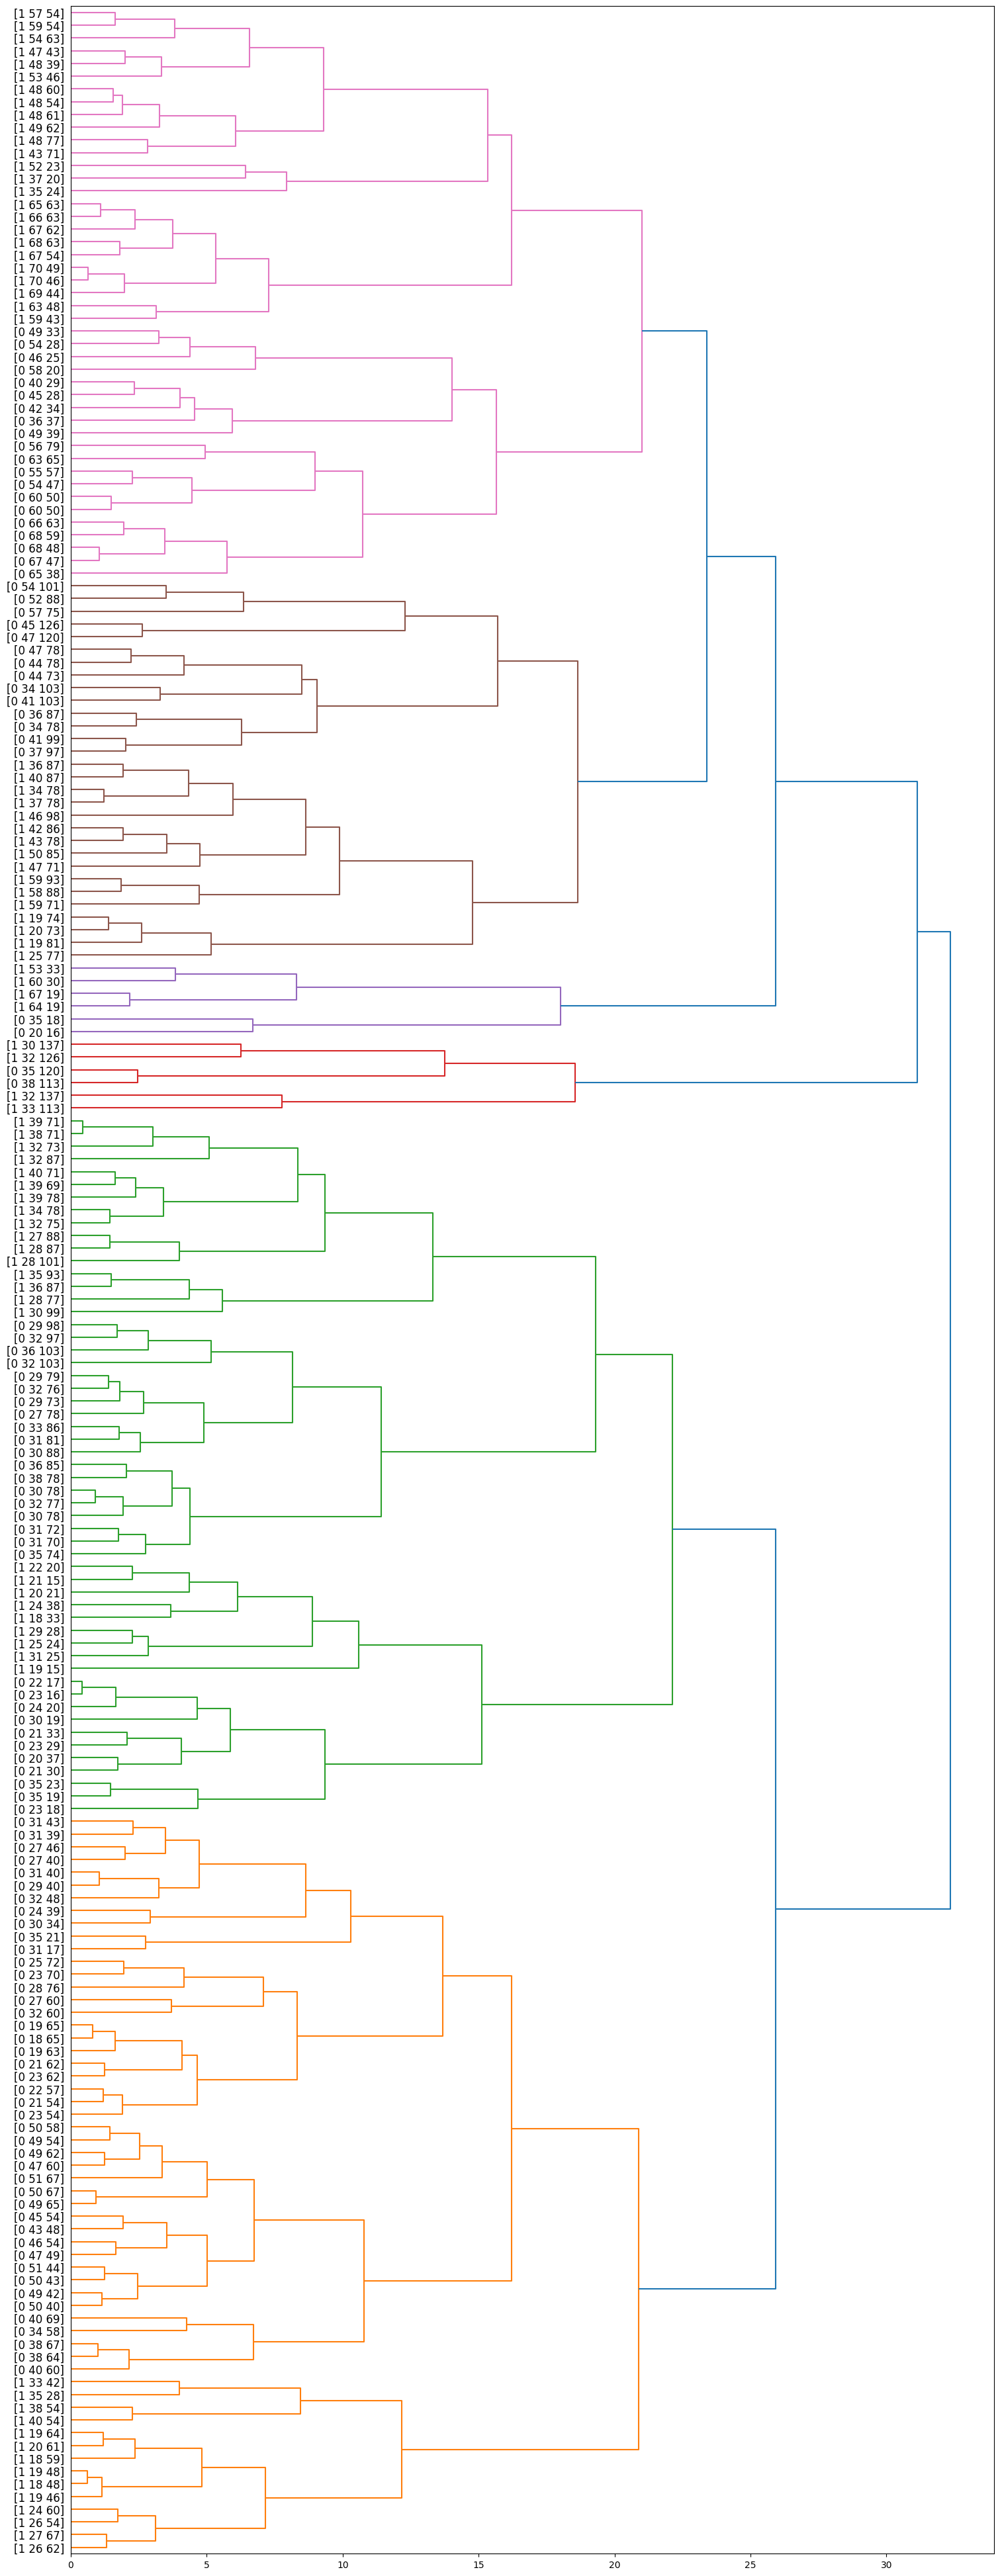

In [156]:
from sklearn.metrics.pairwise import euclidean_distances

from scipy.cluster import hierarchy

dist_matrix = euclidean_distances(x,x) 
print(dist_matrix)

Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

import pylab
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['Gender'][id], df['Age'][id], int(float(df['Annual Income (k$)'][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [158]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

df["cluster"] = agglom.labels_
df.head()

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_agglomerative.py:566: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,4
3,4,0,23,16,77,0
4,5,0,31,17,40,3


In [159]:
clustering = df.groupby(['cluster'])[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
clustering

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,29.563636,61.072727,81.127273
1,55.355556,48.044444,40.911111
2,41.566667,87.033333,15.766667
3,32.879310,53.431034,49.551724
4,49.833333,22.500000,6.166667
5,33.333333,124.333333,58.833333
